In [7]:
import numpy as np
import pandas as pd

In [258]:
df = pd.read_csv(r"C:\Users\anage\Documents\vscode_projects\EV Prediction Project\dataset\ev_prediction_final_with_zipcode5.csv")

In [260]:
df.head()

,Timestamp,Customer_ID,Zip_Code,Government_Subsidy,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Interval_Usage_kWh
0,2024-01-01 00:00:00,1,20001,YES,Apartment,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,0.765963
1,2024-01-01 00:15:00,1,20001,YES,Apartment,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,1.044160
2,2024-01-01 00:30:00,1,20001,YES,Apartment,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,1.168051
3,2024-01-01 00:45:00,1,20001,YES,Apartment,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,0.163634
4,2024-01-01 01:00:00,1,20001,YES,Apartment,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,1.005241


In [262]:
df.shape

(595200, 19)

In [264]:
df.columns.to_list()

['Timestamp',
 'Customer_ID',
 'Zip_Code',
 'Government_Subsidy',
 'Home_Type',
 'Num_Residents',
 'Nearby_Charging_Station_Distance_miles',
 'Has_EV',
 'Num_Vehicles',
 'Charging_Cycles_Per_Week',
 'Household_Income_kUSD',
 'Has_Solar_Panels',
 'Geographic_Location_Score',
 'Power_Factor_Variation',
 'Avg_Temperature_C',
 'Sunlight_Hours_Per_Day',
 'Rainfall_mm',
 'Snowfall_cm',
 'Interval_Usage_kWh']

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595200 entries, 0 to 595199
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Timestamp                               595200 non-null  object 
 1   Customer_ID                             595200 non-null  int64  
 2   Zip_Code                                595200 non-null  int64  
 3   Government_Subsidy                      595200 non-null  object 
 4   Home_Type                               595200 non-null  object 
 5   Num_Residents                           595200 non-null  int64  
 6   Nearby_Charging_Station_Distance_miles  595200 non-null  float64
 7   Has_EV                                  595200 non-null  int64  
 8   Num_Vehicles                            595200 non-null  int64  
 9   Charging_Cycles_Per_Week                595200 non-null  int64  
 10  Household_Income_kUSD                   5952

In [268]:
df['Has_Solar_Panels'].unique()

array([1, 0], dtype=int64)

In [270]:
for col in df.columns.to_list():
    if col not in ['Electricity_Consumption_kWh','Peak_Load_Night_KW','Nighttime_Usage_kWh','Total_Electricity_Usage_kWh','Snowfall_cm',
                   'Rainfall_mm','Sunlight_Hours_Per_Day','Avg_Temperature_C','Power_Factor_Variation','Geographic_Location_Score',
                   'Household_Income_kUSD','Charging_Cycles_Per_Week','Nearby_Charging_Station_Distance_km','Timestamp','Peak_Load_Night_kW',
                  'Interval_Usage_kWh']:
        print(col, "-----", df[col].unique())

Customer_ID ----- [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
Zip_Code ----- [20001 20702 20005 20002 20801 20004 20701 20802 20602 20006 20601 20003]
Government_Subsidy ----- ['YES' 'NO']
Home_Type ----- ['Apartment' 'Townhouse' '

In [298]:
pd.set_option('display.max_rows', 204)

In [304]:
s1 = df.groupby(by='Customer_ID')['Has_EV'].sum() == 2976

In [308]:
s1.value_counts()

Has_EV
False    125
True      75
Name: count, dtype: int64

In [276]:
df.isna().count()

Timestamp                                 595200
Customer_ID                               595200
Zip_Code                                  595200
Government_Subsidy                        595200
Home_Type                                 595200
Num_Residents                             595200
Nearby_Charging_Station_Distance_miles    595200
Has_EV                                    595200
Num_Vehicles                              595200
Charging_Cycles_Per_Week                  595200
Household_Income_kUSD                     595200
Has_Solar_Panels                          595200
Geographic_Location_Score                 595200
Power_Factor_Variation                    595200
Avg_Temperature_C                         595200
Sunlight_Hours_Per_Day                    595200
Rainfall_mm                               595200
Snowfall_cm                               595200
Interval_Usage_kWh                        595200
dtype: int64

In [278]:
## Unique values count in each column
for col in df.columns.to_list():
    print(col, "------",df[col].unique().size)

Timestamp ------ 2976
Customer_ID ------ 200
Zip_Code ------ 12
Government_Subsidy ------ 2
Home_Type ------ 3
Num_Residents ------ 5
Nearby_Charging_Station_Distance_miles ------ 200
Has_EV ------ 2
Num_Vehicles ------ 3
Charging_Cycles_Per_Week ------ 7
Household_Income_kUSD ------ 200
Has_Solar_Panels ------ 2
Geographic_Location_Score ------ 200
Power_Factor_Variation ------ 200
Avg_Temperature_C ------ 200
Sunlight_Hours_Per_Day ------ 200
Rainfall_mm ------ 200
Snowfall_cm ------ 200
Interval_Usage_kWh ------ 595200


In [280]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [282]:
df.shape

(595200, 19)

In [284]:
for col in df.columns.to_list():
    print(col, "------",df[col].unique().size)

Timestamp ------ 2976
Customer_ID ------ 200
Zip_Code ------ 12
Government_Subsidy ------ 2
Home_Type ------ 3
Num_Residents ------ 5
Nearby_Charging_Station_Distance_miles ------ 200
Has_EV ------ 2
Num_Vehicles ------ 3
Charging_Cycles_Per_Week ------ 7
Household_Income_kUSD ------ 200
Has_Solar_Panels ------ 2
Geographic_Location_Score ------ 200
Power_Factor_Variation ------ 200
Avg_Temperature_C ------ 200
Sunlight_Hours_Per_Day ------ 200
Rainfall_mm ------ 200
Snowfall_cm ------ 200
Interval_Usage_kWh ------ 595200


In [290]:
df[['Has_EV']].value_counts()

Has_EV
0         372000
1         223200
Name: count, dtype: int64

In [153]:
df[df['Has_EV']==1].size

192000

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19199 entries, 0 to 19199
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Timestamp                            19199 non-null  datetime64[ns]
 1   Customer_ID                          19199 non-null  int64         
 2   Home_Type                            19199 non-null  object        
 3   Num_Residents                        19199 non-null  int64         
 4   Nearby_Charging_Station_Distance_km  19199 non-null  float64       
 5   Has_EV                               19199 non-null  int64         
 6   Num_Vehicles                         19199 non-null  int64         
 7   Charging_Cycles_Per_Week             19199 non-null  int64         
 8   Household_Income_kUSD                19199 non-null  float64       
 9   Has_Solar_Panels                     19199 non-null  int64         
 10  Geographic_Loca

In [161]:
df.describe()

,Timestamp,Customer_ID,Num_Residents,Nearby_Charging_Station_Distance_km,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Total_Electricity_Usage_kWh,Nighttime_Usage_kWh,Peak_Load_Night_kW,Interval_Usage_kWh
count,19199,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000
mean,2024-01-01 23:52:34.429917952,50.502578,3.129903,10.665955,0.500026,1.090057,1.680088,94.630560,0.270014,63.028210,0.922547,18.284837,6.103114,25.251484,14.916845,787.472801,240.262020,30.032752,8.202953
min,2024-01-01 00:00:00,1.000000,1.000000,0.711334,0.000000,0.000000,0.000000,32.144872,0.000000,20.510870,0.854291,-9.272767,2.200712,1.676622,0.138961,276.106717,65.211144,8.151393,2.788093
25%,2024-01-01 12:00:00,26.000000,2.000000,5.996168,0.000000,1.000000,0.000000,57.994034,0.000000,41.890133,0.884603,7.787874,3.751920,12.578245,7.146058,628.515798,158.109414,19.763677,6.545135
50%,2024-01-02 00:00:00,51.000000,3.000000,11.215813,1.000000,1.000000,1.000000,94.738955,0.000000,67.435195,0.922074,19.495884,5.630823,25.380519,14.951033,791.799582,207.604767,25.950596,8.245752
75%,2024-01-02 11:52:30,75.500000,4.000000,16.200578,1.000000,2.000000,3.000000,131.345928,1.000000,83.090857,0.953096,31.521649,8.057748,38.952254,21.479167,941.218033,317.867956,39.733494,9.800676
max,2024-01-02 23:45:00,100.000000,5.000000,19.862814,1.000000,2.000000,6.000000,149.752093,1.000000,99.769960,0.989487,39.985884,11.865152,49.498012,29.906228,1280.993814,549.777865,68.722233,13.410712
std,NaN,28.865363,1.439838,6.199633,0.500013,0.694182,2.063467,38.095751,0.443978,23.426895,0.039737,14.354473,2.696544,14.031459,8.489908,213.028328,112.351664,14.043958,2.219462


In [167]:
# First, Rename the column names if required.
# Checking the duplicates.
# Removing the unnecessary columns - df.drop(columns=[], axis = 1)
# Imputing the missing values
# Checking the unique() values in every column to understand.
# Changing the type of columns, ex: date and time - 
# Dividing numerical features and categorical features seperately
# Replace the invalid or spaces with Zero's or respective things - df['col'].replace({'old':'new'})
# Class imbalance - Understanding distribution of the target column - df['target'].value_counts()
# 

In [ ]:
# EDA
# Analsis on numerical columns:
    # df.describe() -- Stats only for the numerical columns
    # draw histogram for each numerical column seperately to understand the distribution.
    # skew distribution may affect linear regression, lasso, logistic regression, SVM etc..
    # But skew distribution may not show much affect on Tree based algorithms
    # Outliers - draw box plot to see if any outliers present in each column.
    # co-relation with corr() only with numerical columns and see, which are columns are related.
    # If we see columns are highly co-related, we can chose to remove one of the columns if requied.

# Analysis on categorical columns:
    # Select only categorical columns using - df.select_dtypes(include='object').columns.to_list()
    # feature imbalance in categorical columns - may not be affective for Tree based algorithms.
    # however, imbalance on target column shows affect, irrespective of the model.

# Data pre-processing
    # Handle outliers 
    # apply lable encoders for categorical columns.
    # save the encoder model pickle file.
    # Apply standard scaler for numerical values.
    # Train test split
    # smote - for imbalance targets on training sets.

# Model training
    # Use Cross validation score to find the best model
    # After finding the best model.
    # create an object with that model and save that model after fit.


In [191]:
d1 = df[df['Customer_ID'] == 1][['Timestamp','Total_Electricity_Usage_kWh','Nighttime_Usage_kWh','Interval_Usage_kWh','Peak_Load_Night_kW']]

In [193]:
d1.head()

,Timestamp,Total_Electricity_Usage_kWh,Nighttime_Usage_kWh,Interval_Usage_kWh,Peak_Load_Night_kW
0,2024-01-01 00:00:00,822.139099,156.431153,8.468314,19.553894
2,2024-01-01 00:30:00,788.172583,156.431153,8.297496,19.553894
3,2024-01-01 00:45:00,737.381553,156.431153,7.664817,19.553894
4,2024-01-01 01:00:00,758.171544,156.431153,7.943784,19.553894
5,2024-01-01 01:15:00,830.285474,156.431153,8.600113,19.553894


In [255]:
d1.groupby(df["Timestamp"].dt.date)["Interval_Usage_kWh"].sum()

Timestamp
2024-01-01    779.365856
2024-01-02    777.039438
Name: Interval_Usage_kWh, dtype: float64

In [201]:
import matplotlib.pyplot as plt

In [237]:
d2 = d1[(d1['Timestamp'].dt.day == 1) & (d1['Timestamp'].dt.hour <= 5)]

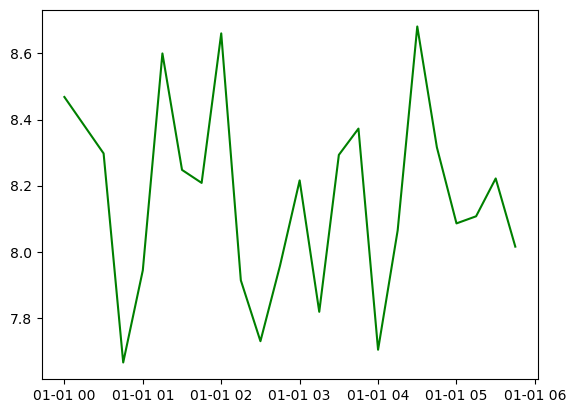

In [253]:
#plt.plot(d2['Timestamp'], d2['Total_Electricity_Usage_kWh'], color = 'red')
#plt.plot(d2['Timestamp'], d2['Nighttime_Usage_kWh'], color = 'blue')
plt.plot(d2['Timestamp'], d2['Interval_Usage_kWh'], color = 'green')
#plt.plot(d2['Timestamp'], d2['Peak_Load_Night_kW'], color = 'black')

In [310]:
df.head()

,Timestamp,Customer_ID,Zip_Code,Government_Subsidy,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Interval_Usage_kWh
0,2024-01-01 00:00:00,1,20001,YES,Apartment,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,0.765963
1,2024-01-01 00:15:00,1,20001,YES,Apartment,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,1.044160
2,2024-01-01 00:30:00,1,20001,YES,Apartment,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,1.168051
3,2024-01-01 00:45:00,1,20001,YES,Apartment,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,0.163634
4,2024-01-01 01:00:00,1,20001,YES,Apartment,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,1.005241


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595200 entries, 0 to 595199
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   Timestamp                               595200 non-null  datetime64[ns]
 1   Customer_ID                             595200 non-null  int64         
 2   Zip_Code                                595200 non-null  int64         
 3   Government_Subsidy                      595200 non-null  object        
 4   Home_Type                               595200 non-null  object        
 5   Num_Residents                           595200 non-null  int64         
 6   Nearby_Charging_Station_Distance_miles  595200 non-null  float64       
 7   Has_EV                                  595200 non-null  int64         
 8   Num_Vehicles                            595200 non-null  int64         
 9   Charging_Cycles_Per_Week             

In [316]:
df['Zip_Code'].value_counts()

Zip_Code
20006    80352
20001    65472
20003    56544
20002    53568
20004    50592
20701    50592
20801    47616
20702    41664
20005    41664
20601    41664
20602    35712
20802    29760
Name: count, dtype: int64

(array([348192.,      0.,      0.,      0.,      0.,      0.,      0.,
         77376.,  92256.,  77376.]),
 array([20001. , 20081.1, 20161.2, 20241.3, 20321.4, 20401.5, 20481.6,
        20561.7, 20641.8, 20721.9, 20802. ]),
 <BarContainer object of 10 artists>)

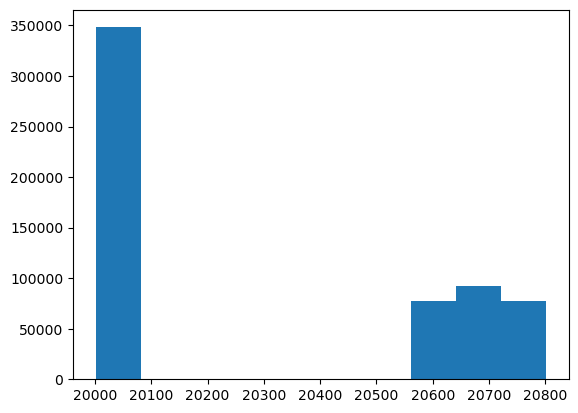

In [322]:
plt.hist(df['Zip_Code'])

(array([241056.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 354144.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

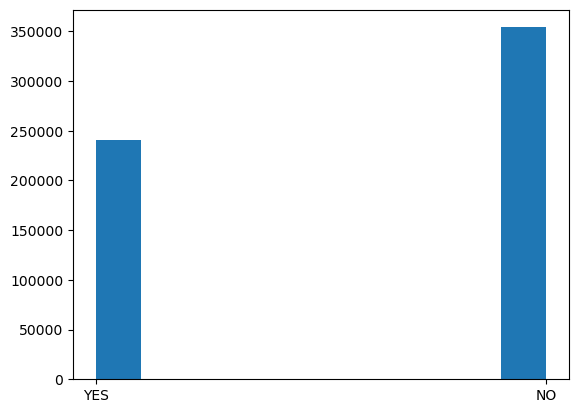

In [324]:
plt.hist(df['Government_Subsidy'])

In [9]:
from sklearn.preprocessing import LabelEncoder

In [328]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(df['Zip_Code'])

LabelEncoder()

In [338]:
np.unique(lbl_encoder.transform(df['Zip_Code']))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [340]:
df['Zip_Code'].unique()

array([20001, 20702, 20005, 20002, 20801, 20004, 20701, 20802, 20602,
       20006, 20601, 20003], dtype=int64)

In [344]:
lbl_encoder.transform([['20801'],['20003']])

C:\Users\anage\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([10,  2], dtype=int64)

In [346]:
df['Zip_Code_Encoded'] = lbl_encoder.transform(df['Zip_Code'])

In [348]:
lbl_encoder2 = LabelEncoder()
lbl_encoder2.fit(df['Government_Subsidy'])

LabelEncoder()

In [350]:
df['Government_Subsidy_Encoder'] = lbl_encoder2.transform(df['Government_Subsidy'])

In [352]:
lbl_encoder3 = LabelEncoder()
lbl_encoder3.fit(df['Home_Type'])
df['Home_Type'] = lbl_encoder3.transform(df['Home_Type'])

In [358]:
## Removing  the encoded columns from the dataframe

In [360]:
df.head()

,Timestamp,Customer_ID,Zip_Code,Government_Subsidy,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,...,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Interval_Usage_kWh,Zip_Code_Encoded,Government_Subsidy_Encoder
0,2024-01-01 00:00:00,1,20001,YES,0,5,15.4717,1,2,5,...,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,0.765963,0,1
1,2024-01-01 00:15:00,1,20001,YES,0,5,15.4717,1,2,5,...,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,1.044160,0,1
2,2024-01-01 00:30:00,1,20001,YES,0,5,15.4717,1,2,5,...,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,1.168051,0,1
3,2024-01-01 00:45:00,1,20001,YES,0,5,15.4717,1,2,5,...,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,0.163634,0,1
4,2024-01-01 01:00:00,1,20001,YES,0,5,15.4717,1,2,5,...,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,1.005241,0,1


In [364]:
df.drop(columns = ['Government_Subsidy','Zip_Code'], axis =1, inplace = True)

In [366]:
df.head()

,Timestamp,Customer_ID,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Interval_Usage_kWh,Zip_Code_Encoded,Government_Subsidy_Encoder
0,2024-01-01 00:00:00,1,0,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,0.765963,0,1
1,2024-01-01 00:15:00,1,0,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,1.044160,0,1
2,2024-01-01 00:30:00,1,0,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,1.168051,0,1
3,2024-01-01 00:45:00,1,0,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,0.163634,0,1
4,2024-01-01 01:00:00,1,0,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,1.005241,0,1


In [372]:
final_df= df.drop(columns=['Timestamp','Customer_ID'], axis = 1)

In [400]:
final_df.head()

,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Interval_Usage_kWh,Zip_Code_Encoded,Government_Subsidy_Encoder,night_kWh
0,0,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,0.765963,0,1,NaN
1,0,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,1.044160,0,1,572.179262
2,0,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,1.168051,0,1,595.503262
3,0,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,0.163634,0,1,597.530398
4,0,5,15.4717,1,2,5,87.388083,1,85.209471,0.85693,10.319615,5.840906,2.059175,19.277279,1.005241,0,1,601.968954


In [374]:
final_df.corr()

,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Interval_Usage_kWh,Zip_Code_Encoded,Government_Subsidy_Encoder
Home_Type,1.000000,0.071932,0.076900,0.019237,0.008636,0.052749,-0.064593,0.004540,0.047844,-0.088918,0.034326,0.021600,0.031249,0.019729,-0.000813,0.005985,0.102169
Num_Residents,0.071932,1.000000,-0.011641,-0.102923,-0.029945,-0.161403,-0.127501,0.176688,-0.019930,0.074404,-0.069659,0.019149,-0.094805,-0.084588,-0.002162,-0.008583,-0.032771
Nearby_Charging_Station_Distance_miles,0.076900,-0.011641,1.000000,0.158142,0.092417,0.137987,-0.027678,-0.078304,-0.047277,0.098454,0.015414,-0.000051,-0.009483,0.010717,-0.000942,-0.141005,0.020001
Has_EV,0.019237,-0.102923,0.158142,1.000000,0.693763,0.857295,-0.010934,0.016748,-0.054803,-0.018083,0.104951,0.118231,-0.001666,0.101307,0.000337,-0.089277,0.433933
Num_Vehicles,0.008636,-0.029945,0.092417,0.693763,1.000000,0.590214,-0.022987,0.126629,0.031138,0.023611,0.149256,0.041995,-0.020647,0.162252,0.000558,-0.087773,0.312786
Charging_Cycles_Per_Week,0.052749,-0.161403,0.137987,0.857295,0.590214,1.000000,0.013301,-0.021510,0.031767,-0.020238,0.022940,0.121903,0.008325,0.154213,0.000445,-0.107064,0.405801
Household_Income_kUSD,-0.064593,-0.127501,-0.027678,-0.010934,-0.022987,0.013301,1.000000,-0.031475,0.121969,-0.068574,0.060025,0.013185,-0.106146,0.121317,0.002327,0.006811,-0.049008
Has_Solar_Panels,0.004540,0.176688,-0.078304,0.016748,0.126629,-0.021510,-0.031475,1.000000,-0.000916,-0.026407,-0.026420,-0.042855,-0.004391,-0.006333,0.002557,0.142559,0.085670
Geographic_Location_Score,0.047844,-0.019930,-0.047277,-0.054803,0.031138,0.031767,0.121969,-0.000916,1.000000,-0.077280,0.037384,-0.002783,0.028706,0.036160,-0.000316,-0.051856,-0.083294
Power_Factor_Variation,-0.088918,0.074404,0.098454,-0.018083,0.023611,-0.020238,-0.068574,-0.026407,-0.077280,1.000000,-0.069905,0.103346,0.034978,0.097689,-0.000068,0.050110,-0.167487


In [376]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595200 entries, 0 to 595199
Data columns (total 17 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Home_Type                               595200 non-null  int32  
 1   Num_Residents                           595200 non-null  int64  
 2   Nearby_Charging_Station_Distance_miles  595200 non-null  float64
 3   Has_EV                                  595200 non-null  int64  
 4   Num_Vehicles                            595200 non-null  int64  
 5   Charging_Cycles_Per_Week                595200 non-null  int64  
 6   Household_Income_kUSD                   595200 non-null  float64
 7   Has_Solar_Panels                        595200 non-null  int64  
 8   Geographic_Location_Score               595200 non-null  float64
 9   Power_Factor_Variation                  595200 non-null  float64
 10  Avg_Temperature_C                       5952

In [378]:
# Creating new features with night peak value for night hours 10PM to 6AM;

In [380]:
df['hour'] = df['Timestamp'].dt.hour

In [384]:
df['date'] = df['Timestamp'].dt.date

In [402]:
df.head()

,Timestamp,Customer_ID,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,...,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Interval_Usage_kWh,Zip_Code_Encoded,Government_Subsidy_Encoder,hour,date
0,2024-01-01 00:00:00,1,0,5,15.4717,1,2,5,87.388083,1,...,0.85693,10.319615,5.840906,2.059175,19.277279,0.765963,0,1,0,2024-01-01
1,2024-01-01 00:15:00,1,0,5,15.4717,1,2,5,87.388083,1,...,0.85693,10.319615,5.840906,2.059175,19.277279,1.044160,0,1,0,2024-01-01
2,2024-01-01 00:30:00,1,0,5,15.4717,1,2,5,87.388083,1,...,0.85693,10.319615,5.840906,2.059175,19.277279,1.168051,0,1,0,2024-01-01
3,2024-01-01 00:45:00,1,0,5,15.4717,1,2,5,87.388083,1,...,0.85693,10.319615,5.840906,2.059175,19.277279,0.163634,0,1,0,2024-01-01
4,2024-01-01 01:00:00,1,0,5,15.4717,1,2,5,87.388083,1,...,0.85693,10.319615,5.840906,2.059175,19.277279,1.005241,0,1,1,2024-01-01


In [390]:
df_nighthours = df[df['hour']>=18]

In [462]:
df_nighthours.head()

,Timestamp,Customer_ID,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,...,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Interval_Usage_kWh,Zip_Code_Encoded,Government_Subsidy_Encoder,hour,date
72,2024-01-01 18:00:00,1,0,5,15.4717,1,2,5,87.388083,1,...,0.85693,10.319615,5.840906,2.059175,19.277279,0.733939,0,1,18,2024-01-01
73,2024-01-01 18:15:00,1,0,5,15.4717,1,2,5,87.388083,1,...,0.85693,10.319615,5.840906,2.059175,19.277279,0.377888,0,1,18,2024-01-01
74,2024-01-01 18:30:00,1,0,5,15.4717,1,2,5,87.388083,1,...,0.85693,10.319615,5.840906,2.059175,19.277279,0.330839,0,1,18,2024-01-01
75,2024-01-01 18:45:00,1,0,5,15.4717,1,2,5,87.388083,1,...,0.85693,10.319615,5.840906,2.059175,19.277279,0.435985,0,1,18,2024-01-01
76,2024-01-01 19:00:00,1,0,5,15.4717,1,2,5,87.388083,1,...,0.85693,10.319615,5.840906,2.059175,19.277279,1.094186,0,1,19,2024-01-01


In [406]:
sum_night_hours = df_nighthours.groupby(by = ['Customer_ID'])['Interval_Usage_kWh'].sum()

In [444]:
sum_night_hours

Customer_ID
1      572.179262
2      595.503262
3      597.530398
4      601.968954
5      583.506547
6      585.431449
7      594.050546
8      602.491448
9      598.776791
10     580.841572
11     583.917725
12     592.618459
13     600.532887
14     607.024176
15     596.734522
16     593.661850
17     610.596892
18     603.321876
19     601.619062
20     599.758143
21     604.546767
22     598.332835
23     586.730559
24     591.760134
25     576.231272
26     583.363055
27     590.249971
28     597.563659
29     584.358587
30     574.314561
31     603.792291
32     587.731308
33     598.123007
34     596.557587
35     585.099210
36     603.391241
37     611.626652
38     631.068636
39     598.819891
40     608.115324
41     578.480226
42     600.840399
43     615.456598
44     600.531286
45     597.348786
46     585.962201
47     590.153016
48     605.194822
49     606.976584
50     596.265761
51     605.611883
52     615.043038
53     589.289439
54     589.770881
55     623.82456

In [448]:
dff = sum_night_hours.to_frame()

In [476]:
dff= dff.reset_index()

In [663]:
dff.head()

,Customer_ID,Interval_Usage_kWh
0,1,572.179262
1,2,595.503262
2,3,597.530398
3,4,601.968954
4,5,583.506547


In [ ]:
# Removing the timestamp, Customer_ID columns

In [464]:
dd2 = df_nighthours.drop(columns=['Timestamp','Interval_Usage_kWh','hour','date'], axis=1)

In [466]:
dd2.drop_duplicates(inplace = True)

In [468]:
dd2.head()

,Customer_ID,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Zip_Code_Encoded,Government_Subsidy_Encoder
72,1,0,5,15.471700,1,2,5,87.388083,1,85.209471,0.856930,10.319615,5.840906,2.059175,19.277279,0,1
3048,2,0,5,2.202159,0,0,0,90.732907,0,69.198259,0.966664,6.199503,2.367319,33.519273,22.780330,9,0
6024,3,0,5,10.369027,1,1,3,57.906163,0,75.030729,0.968149,-5.653749,11.572703,47.577499,15.013359,4,1
9000,4,2,5,18.674280,0,0,0,39.595847,0,50.020792,0.889887,21.662039,10.262057,6.210998,16.270910,1,0
11976,5,1,2,6.752523,0,0,0,123.206836,0,63.095653,0.914799,26.795231,10.007697,44.811065,28.544357,10,0


In [472]:
dd2.to_csv("mine.csv")

In [474]:
dd2.shape

(200, 17)

In [482]:
final_df= pd.merge(dd2, dff, on='Customer_ID')
final_df

,Customer_ID,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Zip_Code_Encoded,Government_Subsidy_Encoder,Interval_Usage_kWh
0,1,0,5,15.471700,1,2,5,87.388083,1,85.209471,0.856930,10.319615,5.840906,2.059175,19.277279,0,1,572.179262
1,2,0,5,2.202159,0,0,0,90.732907,0,69.198259,0.966664,6.199503,2.367319,33.519273,22.780330,9,0,595.503262
2,3,0,5,10.369027,1,1,3,57.906163,0,75.030729,0.968149,-5.653749,11.572703,47.577499,15.013359,4,1,597.530398
3,4,2,5,18.674280,0,0,0,39.595847,0,50.020792,0.889887,21.662039,10.262057,6.210998,16.270910,1,0,601.968954
4,5,1,2,6.752523,0,0,0,123.206836,0,63.095653,0.914799,26.795231,10.007697,44.811065,28.544357,10,0,583.506547
5,6,1,2,12.080720,1,2,1,44.644206,1,61.932734,0.911395,32.406405,8.297779,29.738832,25.415021,0,1,585.431449
6,7,0,3,7.699994,0,0,0,101.314890,0,87.843823,0.880591,-3.861156,4.163240,30.830229,27.427095,3,0,594.050546
7,8,1,1,9.358225,1,1,4,142.373901,0,87.197118,0.905552,33.822204,7.182604,30.647209,24.412989,8,0,602.491448
8,9,1,5,11.197761,1,1,2,135.132623,0,86.614438,0.856214,22.146278,7.972741,14.941794,3.267550,0,1,598.776791
9,10,0,1,11.203979,1,1,1,63.330315,0,20.882529,0.888895,25.197307,7.250315,46.760091,4.469756,4,0,580.841572


In [488]:
final_df.rename(columns={'Interval_Usage_kWh':'nighthours_kWh'}, inplace = True)

In [665]:
final_df.head()

,Customer_ID,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Zip_Code_Encoded,Government_Subsidy_Encoder,nighthours_kWh
0,1,0,5,15.471700,1,2,5,87.388083,1,85.209471,0.856930,10.319615,5.840906,2.059175,19.277279,0,1,572.179262
1,2,0,5,2.202159,0,0,0,90.732907,0,69.198259,0.966664,6.199503,2.367319,33.519273,22.780330,9,0,595.503262
2,3,0,5,10.369027,1,1,3,57.906163,0,75.030729,0.968149,-5.653749,11.572703,47.577499,15.013359,4,1,597.530398
3,4,2,5,18.674280,0,0,0,39.595847,0,50.020792,0.889887,21.662039,10.262057,6.210998,16.270910,1,0,601.968954
4,5,1,2,6.752523,0,0,0,123.206836,0,63.095653,0.914799,26.795231,10.007697,44.811065,28.544357,10,0,583.506547


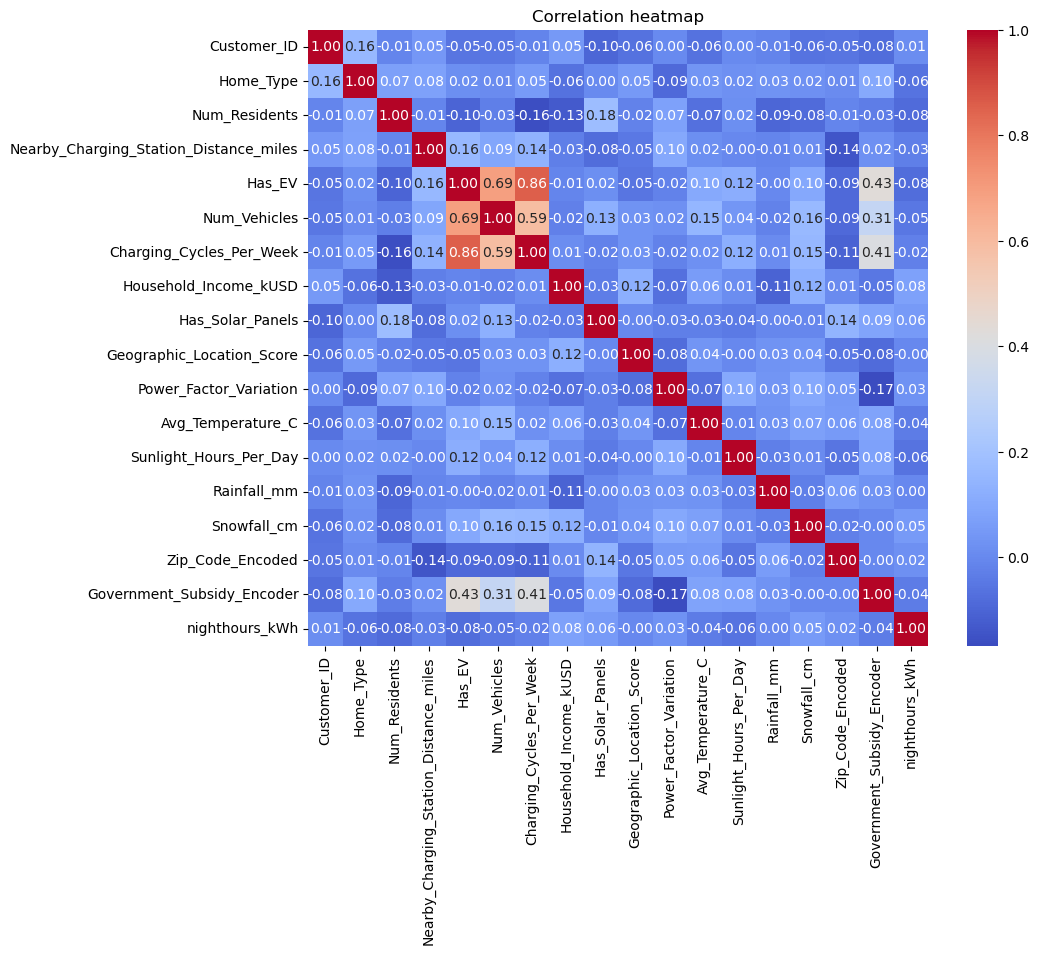

In [661]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.heatmap(final_df.corr(), annot=True, cmap = "coolwarm", fmt = '0.2f')
plt.title("Correlation heatmap")
plt.show()

In [556]:
X = final_df.drop(columns = ['Has_EV','Customer_ID'], axis=1)

In [582]:
X= X.reset_index()

In [586]:
X = X.drop(columns = ['index'], axis=1)

In [588]:
X.head()

,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Zip_Code_Encoded,Government_Subsidy_Encoder,nighthours_kWh
0,0,5,15.471700,2,5,87.388083,1,85.209471,0.856930,10.319615,5.840906,2.059175,19.277279,0,1,572.179262
1,0,5,2.202159,0,0,90.732907,0,69.198259,0.966664,6.199503,2.367319,33.519273,22.780330,9,0,595.503262
2,0,5,10.369027,1,3,57.906163,0,75.030729,0.968149,-5.653749,11.572703,47.577499,15.013359,4,1,597.530398
3,2,5,18.674280,0,0,39.595847,0,50.020792,0.889887,21.662039,10.262057,6.210998,16.270910,1,0,601.968954
4,1,2,6.752523,0,0,123.206836,0,63.095653,0.914799,26.795231,10.007697,44.811065,28.544357,10,0,583.506547


In [590]:
y = final_df.iloc[:,4:5]

In [592]:
y.head()

,Has_EV
0,1
1,0
2,1
3,0
4,0


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

In [594]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [596]:
X_train.values

array([[  2.        ,   2.        ,  11.02728242, ...,   3.        ,
          0.        , 595.6671106 ],
       [  2.        ,   4.        ,  19.27166171, ...,   6.        ,
          1.        , 602.72053912],
       [  0.        ,   2.        ,  18.20338954, ...,   8.        ,
          1.        , 598.81989076],
       ...,
       [  1.        ,   5.        ,   8.76013882, ...,   1.        ,
          1.        , 583.27270176],
       [  2.        ,   4.        ,  19.58916299, ...,   0.        ,
          1.        , 603.23933413],
       [  1.        ,   2.        ,  18.41563518, ...,   2.        ,
          0.        , 609.70626401]])

In [598]:
models = {
    "logisticReg":LogisticRegression(),
    "svm":SVC(),
    "rfc":RandomForestClassifier(),
    "xgb":XGBClassifier()
}

In [600]:
for model_name, model in models.items():
    model.fit(X_train.values, y_train.values)
    y_pred = model.predict(X_test.values)
    print(f"Accuracy score of {model_name} is ----- ", accuracy_score(y_test, y_pred))
    print(cross_val_score(model, X_train.values, y_train.values, cv=3))

C:\Users\anage\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anage\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anage\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

Accuracy score of logisticReg is -----  1.0
[1.         1.         0.98113208]
Accuracy score of svm is -----  0.625
[0.62962963 0.62264151 0.62264151]
Accuracy score of rfc is -----  1.0


C:\Users\anage\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\anage\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\anage\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[1. 1. 1.]
Accuracy score of xgb is -----  1.0
[1. 1. 1.]


In [604]:
import pickle

In [606]:
# Creating xgb model to save
xgb2 = XGBClassifier()
xgb2.fit(X_train, y_train)
y_pred = xgb2.predict (X_test)

print(accuracy_score(y_test, y_pred))

1.0


In [634]:
xgb2.predict(X_test.iloc[0:1,:].values)

array([0])

In [638]:
type(X_test.iloc[0:1,:].values)

numpy.ndarray

In [608]:
# Saving the model into a pickle file
filename = 'EV_pred_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(xgb2, file)

In [610]:
# load the model to make new predictions
filename = 'EV_pred_model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

In [612]:
X_test.head()

,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Zip_Code_Encoded,Government_Subsidy_Encoder,nighthours_kWh
95,1,2,18.281122,0,0,42.683218,0,24.582420,0.921635,-9.883030,9.085720,44.185483,0.474633,5,0,588.155410
15,1,1,2.775573,2,5,76.375301,0,57.625524,0.930469,-8.288594,6.633807,33.041006,22.406271,1,1,593.661850
30,1,1,15.739532,1,0,104.166201,1,52.186170,0.983565,15.622883,9.352127,37.213953,15.692542,5,0,603.792291
158,1,2,7.313046,1,6,61.011794,0,73.135033,0.873134,-6.498515,8.073064,38.425968,11.427286,0,1,593.382612
128,1,3,8.582839,1,3,38.310517,0,86.229470,0.918299,11.088133,11.095245,19.868949,28.849972,0,0,603.056518


In [616]:
X_test.to_csv('sample.csv')

In [618]:
s= ['1','2','18.28112197',	'0','0','42.68321759','0','24.58242009','0.921635394','-9.883030469','9.085720046','44.18548348','0.474632753','5','0','588.1554101']

In [642]:
arr = np.array(s)
type(arr)

numpy.ndarray

In [646]:
print(loaded_model.predict(X_test))

[0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1
 0 1 0]


In [648]:
X_test.iloc[0:1,:].values

array([[ 1.00000000e+00,  2.00000000e+00,  1.82811220e+01,
         0.00000000e+00,  0.00000000e+00,  4.26832176e+01,
         0.00000000e+00,  2.45824201e+01,  9.21635394e-01,
        -9.88303047e+00,  9.08572005e+00,  4.41854835e+01,
         4.74632753e-01,  5.00000000e+00,  0.00000000e+00,
         5.88155410e+02]])

In [654]:
arr

array(['1', '2', '18.28112197', '0', '0', '42.68321759', '0',
       '24.58242009', '0.921635394', '-9.883030469', '9.085720046',
       '44.18548348', '0.474632753', '5', '0', '588.1554101'],
      dtype='<U12')

In [ ]:
## Testing with a new dataset:

In [3]:
import numpy as np
import pandas as pd
import pickle
import joblib

In [7]:
dk = pd.read_csv(r"C:\Users\anage\Documents\vscode_projects\EV Ownership Prediction\EV Prediction Project\dataset\raw\ev_prediction_final_with_zipcode7.csv")

In [9]:
dk.shape

(3072000, 19)

In [12]:
dk['Has_EV'].corr(dk['Num_Residents'])

0.01522405888769767

In [14]:
dk['Has_EV'].corr(dk['Customer_ID'])

0.10622376842325625

In [16]:
dk['Has_EV'].corr(dk['Nearby_Charging_Station_Distance_miles'])

-0.1093005417718132

In [18]:
dk['Has_EV'].corr(dk['Num_Vehicles'])

0.6788022337139484

In [20]:
dk['Has_EV'].corr(dk['Charging_Cycles_Per_Week'])

0.7477115106219665

In [22]:
dk['Has_EV'].corr(dk['Household_Income_kUSD'])

0.09111413415048913

In [24]:
dk['Has_EV'].corr(dk['Has_Solar_Panels'])

0.1020407698284329

In [26]:
dk['Has_EV'].corr(dk['Geographic_Location_Score'])

0.08044762082289202

In [28]:
dk['Has_EV'].corr(dk['Power_Factor_Variation'])

-0.052736436272435135

In [30]:
dk['Has_EV'].corr(dk['Avg_Temperature_C'])

0.03403511022039233

In [32]:
dk['Has_EV'].corr(dk['Sunlight_Hours_Per_Day'])

-0.05451066426255716

In [34]:
dk['Has_EV'].corr(dk['Rainfall_mm'])

0.014875026757577325

In [36]:
dk['Has_EV'].corr(dk['Snowfall_cm'])

0.0013326784689483837

In [38]:
dk['Has_EV'].corr(dk['Interval_Usage_kWh'])

-3.9072657072859116e-05

In [40]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072000 entries, 0 to 3071999
Data columns (total 19 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   Timestamp                               object 
 1   Customer_ID                             int64  
 2   Zip_Code                                int64  
 3   Government_Subsidy                      object 
 4   Home_Type                               object 
 5   Num_Residents                           int64  
 6   Nearby_Charging_Station_Distance_miles  float64
 7   Has_EV                                  int64  
 8   Num_Vehicles                            int64  
 9   Charging_Cycles_Per_Week                int64  
 10  Household_Income_kUSD                   float64
 11  Has_Solar_Panels                        int64  
 12  Geographic_Location_Score               float64
 13  Power_Factor_Variation                  float64
 14  Avg_Temperature_C                 

In [42]:
dk['Timestamp'] = pd.to_datetime(dk['Timestamp'])

In [43]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072000 entries, 0 to 3071999
Data columns (total 19 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   Timestamp                               datetime64[ns]
 1   Customer_ID                             int64         
 2   Zip_Code                                int64         
 3   Government_Subsidy                      object        
 4   Home_Type                               object        
 5   Num_Residents                           int64         
 6   Nearby_Charging_Station_Distance_miles  float64       
 7   Has_EV                                  int64         
 8   Num_Vehicles                            int64         
 9   Charging_Cycles_Per_Week                int64         
 10  Household_Income_kUSD                   float64       
 11  Has_Solar_Panels                        int64         
 12  Geographic_Location_Score               fl

In [46]:
#Encoding the categorical columns

In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [58]:
cat_columns = ['Zip_Code','Government_Subsidy','Home_Type']
encoders = {}


for col in cat_columns:
    lable = ""
    lable = "Encoder" + col
    lable = LabelEncoder()
    dk[col]=lable.fit_transform(dk[col])
    encoders[col] = lable

print(encoders)

{'Zip_Code': LabelEncoder(), 'Government_Subsidy': LabelEncoder(), 'Home_Type': LabelEncoder()}


In [60]:
# saving categorical encoders in a pickle file

with open("cat_encoders.pkl","wb") as file:
    pickle.dump(encoders, file)

In [65]:
dk.head()

,Timestamp,Customer_ID,Zip_Code,Government_Subsidy,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Interval_Usage_kWh
0,2024-01-01 00:00:00,1,0,0,1,4,10.328073,1,1,1,59.035276,0,32.073279,0.905052,30.523411,10.776922,14.408226,25.007223,0.900028
1,2024-01-01 00:15:00,1,0,0,1,4,10.328073,1,1,1,59.035276,0,32.073279,0.905052,30.523411,10.776922,14.408226,25.007223,1.480538
2,2024-01-01 00:30:00,1,0,0,1,4,10.328073,1,1,1,59.035276,0,32.073279,0.905052,30.523411,10.776922,14.408226,25.007223,0.925221
3,2024-01-01 00:45:00,1,0,0,1,4,10.328073,1,1,1,59.035276,0,32.073279,0.905052,30.523411,10.776922,14.408226,25.007223,0.177531
4,2024-01-01 01:00:00,1,0,0,1,4,10.328073,1,1,1,59.035276,0,32.073279,0.905052,30.523411,10.776922,14.408226,25.007223,0.170903


In [69]:
dk['hour'] = dk['Timestamp'].dt.hour

In [71]:
dk.head()

,Timestamp,Customer_ID,Zip_Code,Government_Subsidy,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Interval_Usage_kWh,hour
0,2024-01-01 00:00:00,1,0,0,1,4,10.328073,1,1,1,59.035276,0,32.073279,0.905052,30.523411,10.776922,14.408226,25.007223,0.900028,0
1,2024-01-01 00:15:00,1,0,0,1,4,10.328073,1,1,1,59.035276,0,32.073279,0.905052,30.523411,10.776922,14.408226,25.007223,1.480538,0
2,2024-01-01 00:30:00,1,0,0,1,4,10.328073,1,1,1,59.035276,0,32.073279,0.905052,30.523411,10.776922,14.408226,25.007223,0.925221,0
3,2024-01-01 00:45:00,1,0,0,1,4,10.328073,1,1,1,59.035276,0,32.073279,0.905052,30.523411,10.776922,14.408226,25.007223,0.177531,0
4,2024-01-01 01:00:00,1,0,0,1,4,10.328073,1,1,1,59.035276,0,32.073279,0.905052,30.523411,10.776922,14.408226,25.007223,0.170903,1


In [73]:
# Getting the night readings by summing the interval readings
total_night_reads = dk[(dk['hour'] >= 18) & (dk['hour'] <= 24)].groupby('Customer_ID')['Interval_Usage_kWh'].sum().to_frame()

In [75]:
total_night_reads.reset_index(inplace = True)

In [77]:
total_night_reads.rename(columns = {'Interval_Usage_kWh':'Total_night_kWh'}, inplace = True)

In [79]:
total_night_reads.head()

,Customer_ID,Total_night_kWh
0,1,617.012583
1,2,611.481770
2,3,606.885450
3,4,615.436042
4,5,597.232412


In [81]:
# Remvoing timestamp, interval_Usage_kWh and dropping duplicates to have one record for one customer
dk2 = dk.drop(columns=['Timestamp','Interval_Usage_kWh','hour'], axis = 1).drop_duplicates()

In [82]:
dk2.shape

(1000, 17)

In [85]:
final_df= pd.merge(dk2, total_night_reads, on='Customer_ID')

In [87]:
final_df.head()

,Customer_ID,Zip_Code,Government_Subsidy,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Total_night_kWh
0,1,0,0,1,4,10.328073,1,1,1,59.035276,0,32.073279,0.905052,30.523411,10.776922,14.408226,25.007223,617.012583
1,2,9,0,1,2,19.009414,0,1,0,63.415835,0,83.414199,0.965691,3.632532,2.895660,30.196022,5.853265,611.481770
2,3,4,1,1,3,16.740222,1,1,5,137.576743,0,91.004997,0.887421,26.578106,9.153641,2.479675,26.778340,606.885450
3,4,1,0,1,4,7.567411,0,1,0,106.346259,0,42.641357,0.888857,8.606011,4.711423,4.734050,13.759497,615.436042
4,5,10,1,1,4,17.341008,1,1,2,117.682092,1,55.037117,0.923134,16.094216,9.603282,1.642835,20.309303,597.232412


In [89]:
final_df.dtypes

Customer_ID                                 int64
Zip_Code                                    int64
Government_Subsidy                          int32
Home_Type                                   int32
Num_Residents                               int64
Nearby_Charging_Station_Distance_miles    float64
Has_EV                                      int64
Num_Vehicles                                int64
Charging_Cycles_Per_Week                    int64
Household_Income_kUSD                     float64
Has_Solar_Panels                            int64
Geographic_Location_Score                 float64
Power_Factor_Variation                    float64
Avg_Temperature_C                         float64
Sunlight_Hours_Per_Day                    float64
Rainfall_mm                               float64
Snowfall_cm                               float64
Total_night_kWh                           float64
dtype: object

In [91]:
# Scaling the numerical columns

In [93]:
num_cols = ['Nearby_Charging_Station_Distance_miles','Household_Income_kUSD','Geographic_Location_Score',
            'Avg_Temperature_C','Sunlight_Hours_Per_Day','Rainfall_mm','Snowfall_cm','Total_night_kWh']


In [95]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

num_encoders = {}

for col in num_cols:
    num_lable = ""
    num_lable = "Encoder" + col
    num_lable = StandardScaler()
    final_df[col]=num_lable.fit_transform(final_df[[col]])
    num_encoders[col] = num_lable

print(num_encoders)

{'Nearby_Charging_Station_Distance_miles': StandardScaler(), 'Household_Income_kUSD': StandardScaler(), 'Geographic_Location_Score': StandardScaler(), 'Avg_Temperature_C': StandardScaler(), 'Sunlight_Hours_Per_Day': StandardScaler(), 'Rainfall_mm': StandardScaler(), 'Snowfall_cm': StandardScaler(), 'Total_night_kWh': StandardScaler()}


In [97]:
final_df.head()

,Customer_ID,Zip_Code,Government_Subsidy,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Total_night_kWh
0,1,0,0,1,4,0.039616,1,1,1,-0.902670,0,-1.238614,0.905052,1.125104,1.315115,-0.745027,1.094474,0.225521
1,2,9,0,1,2,1.564562,0,1,0,-0.775206,0,1.006619,0.965691,-0.755552,-1.378631,0.363649,-1.091929,-0.277714
2,3,4,1,1,3,1.165961,1,1,5,1.382704,0,1.338579,0.887421,0.849182,0.760292,-1.582693,1.296645,-0.695921
3,4,1,0,1,4,-0.445316,0,1,0,0.473969,0,-0.776453,0.888857,-0.407724,-0.758020,-1.424383,-0.189441,0.082076
4,5,10,1,1,4,1.271494,1,1,2,0.803815,1,-0.234363,0.923134,0.115975,0.913975,-1.641459,0.558212,-1.574226


In [99]:
# re encoding using chatgpt

In [101]:
scalers_dict = {}

# Step 3: Apply StandardScaler() to each numerical column
for col in num_cols:
    scaler = StandardScaler()  # Create a new scaler for each feature
    final_df[col] = scaler.fit_transform(final_df[[col]])  # Scale the column
    scalers_dict[col] = scaler  # Store the fitted scaler in the dictionary
    print(f"✅ Successfully scaled: {col}")

✅ Successfully scaled: Nearby_Charging_Station_Distance_miles
✅ Successfully scaled: Household_Income_kUSD
✅ Successfully scaled: Geographic_Location_Score
✅ Successfully scaled: Avg_Temperature_C
✅ Successfully scaled: Sunlight_Hours_Per_Day
✅ Successfully scaled: Rainfall_mm
✅ Successfully scaled: Snowfall_cm
✅ Successfully scaled: Total_night_kWh


In [103]:
final_df.head(1)

,Customer_ID,Zip_Code,Government_Subsidy,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Total_night_kWh
0,1,0,0,1,4,0.039616,1,1,1,-0.90267,0,-1.238614,0.905052,1.125104,1.315115,-0.745027,1.094474,0.225521


In [105]:
final_df.to_csv(r"C:\Users\anage\Documents\vscode_projects\EV Ownership Prediction\EV Prediction Project\dataset\processed\final_processed_data.csv")

In [410]:
with open("scalers_dict.pkl", "wb") as f:
    pickle.dump(scalers_dict, f)

print("✅ All numerical features scaled and scalers saved successfully!")

✅ All numerical features scaled and scalers saved successfully!


In [338]:
# saving numerical encoders in a pickle file
import pickle
with open("num_encoders.pkl","wb") as file:
    pickle.dump(num_encoders, file)


In [346]:
import joblib
joblib.dump(num_encoders, "num_encoders.pkl")

['num_encoders.pkl']

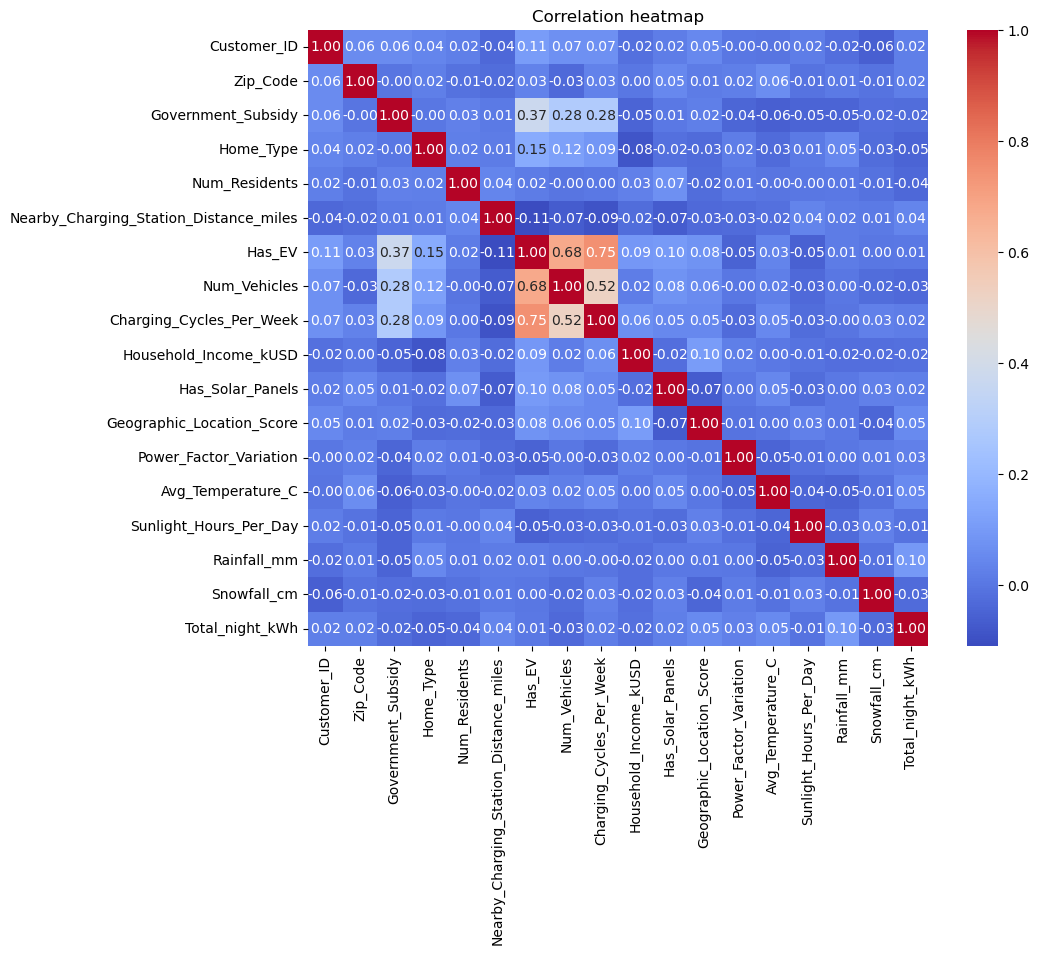

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,8))
sns.heatmap(final_df.corr(), annot=True, cmap = "coolwarm", fmt = '0.2f')
plt.title("Correlation heatmap")
plt.show()

In [100]:
final_df.drop(columns=['Customer_ID'], axis = 1, inplace = True)

In [102]:
final_df.head()

,Zip_Code,Government_Subsidy,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Has_EV,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Total_night_kWh
0,0,0,1,4,0.039616,1,1,1,-0.902670,0,-1.238614,0.905052,1.125104,1.315115,-0.745027,1.094474,0.225521
1,9,0,1,2,1.564562,0,1,0,-0.775206,0,1.006619,0.965691,-0.755552,-1.378631,0.363649,-1.091929,-0.277714
2,4,1,1,3,1.165961,1,1,5,1.382704,0,1.338579,0.887421,0.849182,0.760292,-1.582693,1.296645,-0.695921
3,1,0,1,4,-0.445316,0,1,0,0.473969,0,-0.776453,0.888857,-0.407724,-0.758020,-1.424383,-0.189441,0.082076
4,10,1,1,4,1.271494,1,1,2,0.803815,1,-0.234363,0.923134,0.115975,0.913975,-1.641459,0.558212,-1.574226


In [104]:
y = final_df[['Has_EV']]

In [106]:
X = final_df.drop(columns=['Has_EV'], axis = 1)

In [108]:
X.head()

,Zip_Code,Government_Subsidy,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Num_Vehicles,Charging_Cycles_Per_Week,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Total_night_kWh
0,0,0,1,4,0.039616,1,1,-0.902670,0,-1.238614,0.905052,1.125104,1.315115,-0.745027,1.094474,0.225521
1,9,0,1,2,1.564562,1,0,-0.775206,0,1.006619,0.965691,-0.755552,-1.378631,0.363649,-1.091929,-0.277714
2,4,1,1,3,1.165961,1,5,1.382704,0,1.338579,0.887421,0.849182,0.760292,-1.582693,1.296645,-0.695921
3,1,0,1,4,-0.445316,1,0,0.473969,0,-0.776453,0.888857,-0.407724,-0.758020,-1.424383,-0.189441,0.082076
4,10,1,1,4,1.271494,1,2,0.803815,1,-0.234363,0.923134,0.115975,0.913975,-1.641459,0.558212,-1.574226


In [110]:
##to check the accuracy score dropping charging_cycles_perweek column
X = X.drop(columns=['Charging_Cycles_Per_Week','Num_Vehicles'], axis = 1)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [114]:
y_train.value_counts()

Has_EV
1         546
0         254
Name: count, dtype: int64

In [116]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

Before OverSampling, the shape of train_X: (800, 14)
Before OverSampling, the shape of train_y: (800, 1) 



In [118]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train['Has_EV'] == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train['Has_EV'] == 0)))

Before OverSampling, counts of label '1': 546
Before OverSampling, counts of label '0': 254 



In [120]:
#USing SMOTE for the feature set imbalance

In [122]:
from imblearn.over_sampling import SMOTE

In [124]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train.values, y_train.values.ravel())

In [126]:
X_train_res

array([[11.        ,  0.        ,  1.        , ...,  0.13949092,
         0.10346457,  0.32430825],
       [ 7.        ,  1.        ,  1.        , ..., -0.61322572,
        -0.69941523,  0.46155388],
       [ 6.        ,  1.        ,  1.        , ..., -1.59389595,
         0.12729266,  0.28782925],
       ...,
       [ 4.44628497,  0.        ,  1.44628497, ...,  0.83218103,
         1.27992608, -0.69933432],
       [ 0.23326436,  0.        ,  1.        , ..., -1.11138899,
         0.92627328, -1.85823014],
       [10.        ,  0.        ,  0.        , ..., -0.12039086,
         0.16556829, -0.38265113]])

In [128]:
y_train_res

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [130]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res== 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res== 1)))

After OverSampling, the shape of train_X: (1092, 14)
After OverSampling, the shape of train_y: (1092,) 

After OverSampling, counts of label '1': 546
After OverSampling, counts of label '0': 546


In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [136]:
# Model training
models = {
    "log":LogisticRegression(),
    "rfc":RandomForestClassifier(),
    "svc":SVC(),
    "dt":DecisionTreeClassifier(),
    "xgb_new":XGBClassifier(),
}

In [138]:
for model_name, model in models.items():
    print(model)
    model.fit(X_train_res, y_train_res)
    print("Accuracy Score---->", accuracy_score(y_test.values, model.predict(X_test.values)))
    print("Classification Report---->")
    print(classification_report(y_test, model.predict(X_test.values)))
    print(confusion_matrix(y_test, model.predict(X_test.values)))
    print("---"*50)
    print("---"*50)

LogisticRegression()
Accuracy Score----> 0.695
Classification Report---->
              precision    recall  f1-score   support

           0       0.48      0.76      0.59        58
           1       0.87      0.67      0.76       142

    accuracy                           0.69       200
   macro avg       0.68      0.71      0.67       200
weighted avg       0.76      0.69      0.71       200

[[44 14]
 [47 95]]
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
RandomForestClassifier()
Accuracy Score----> 0.735
Classification Report---->
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        58
           1       0.80      0.83      0.82       142

    accuracy                        

In [140]:
xgb_m = XGBClassifier()
xgb_m.fit(X_train_res, y_train_res)
y_pred_m = xgb_m.predict(X_test.values)
print(accuracy_score(y_test.values, y_pred_m))

0.73


In [142]:
X_test.values[0].shape

(14,)

In [144]:
xgb_m.feature_importances_

array([0.03203387, 0.41869047, 0.15838355, 0.03328389, 0.04166029,
       0.03522683, 0.06745537, 0.02604353, 0.03623025, 0.02559504,
       0.02644101, 0.03289016, 0.03343539, 0.03263029], dtype=float32)

In [146]:
xgb_m.feature_names_in_

AttributeError: `feature_names_in_` is defined only when `X` has feature names that are all strings.

In [148]:
X_train.head(1)

,Zip_Code,Government_Subsidy,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Total_night_kWh
29,11,0,1,1,0.502133,0.982831,0,-1.494277,0.959698,1.573385,1.275948,0.139491,0.103465,0.324308


In [150]:
# Hyper parameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

KeyboardInterrupt: 

In [152]:
rf2 = RandomForestClassifier(random_state=42, max_depth = 20, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300)
#rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X_train_res, y_train_res)
print(accuracy_score(y_test.values, rf2.predict(X_test.values)))

0.725


In [1312]:
## Hyper parameter tuning with XGBoost

In [1314]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_lambda': [0.1, 1, 10],
    'reg_alpha': [0, 0.1, 1, 10]
}

# Initialize XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_iter=20, n_jobs=-1, random_state=42)
random_search.fit(X_train_res, y_train_res)

# Best parameters
print("Best Parameters:", random_search.best_params_)

C:\Users\anage\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:44:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}


In [154]:
xgb22 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, 
                      subsample= 0.7, reg_lambda= 0.1, reg_alpha = 0.1, n_estimators= 100, max_depth =10, 
                      learning_rate= 0.05, gamma= 0, colsample_bytree = 0.7)
xgb22.fit(X_train_res, y_train_res)
print(accuracy_score(y_test.values, xgb22.predict(X_test.values)))

C:\Users\anage\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:07:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.725


In [156]:
import joblib

joblib.dump(xgb22, 'xgb_model.pkl')

['xgb_model.pkl']

In [ ]:
#with open("num_encoders.pkl","wb") as file:
#    pickle.dump(num_encoders, file)

#with open("cat_encoders.pkl","wb") as file:
#    pickle.dump(encoders, file)

In [412]:
# Creating one test data, for encoding and predicting using the pickle files
data = {
    "Zip_Code": 20001,
    "Government_Subsidy": "NO",
    "Home_Type": "Detached House",
    "Num_Residents": 4,
    "Nearby_Charging_Station_Distance_miles": 10.32807339,
    "Household_Income_kUSD": 59.03527628,
    "Has_Solar_Panels": 0,
    "Geographic_Location_Score": 32.07327862,
    "Power_Factor_Variation": 0.905052298,
    "Avg_Temperature_C": 30.52341086,
    "Sunlight_Hours_Per_Day": 10.77692179,
    "Rainfall_mm": 14.40822614,
    "Snowfall_cm": 25.00722329,
    "Total_night_kWh": 582.00
}
test_df = pd.DataFrame([data])
test_df

,Zip_Code,Government_Subsidy,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Total_night_kWh
0,20001,NO,Detached House,4,10.328073,59.035276,0,32.073279,0.905052,30.523411,10.776922,14.408226,25.007223,582.0


In [414]:
# Load the saved scalers
with open("scalers_dict.pkl", "rb") as f:
    loaded_scalers = pickle.load(f)

# Apply transformations to test data
for col, scaler in loaded_scalers.items():
    test_df[col] = scaler.transform(test_df[[col]])  # Transform using saved scaler
    print(f"✅ Successfully transformed: {col}")

print("✅ Test data transformation complete!")

✅ Successfully transformed: Nearby_Charging_Station_Distance_miles
✅ Successfully transformed: Household_Income_kUSD
✅ Successfully transformed: Geographic_Location_Score
✅ Successfully transformed: Avg_Temperature_C
✅ Successfully transformed: Sunlight_Hours_Per_Day
✅ Successfully transformed: Rainfall_mm
✅ Successfully transformed: Snowfall_cm
✅ Successfully transformed: Total_night_kWh
✅ Test data transformation complete!


In [416]:
test_df

,Zip_Code,Government_Subsidy,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Total_night_kWh
0,20001,NO,Detached House,4,0.039616,-0.90267,0,-1.238614,0.905052,1.125104,1.315115,-0.745027,1.094474,-2.960184


In [418]:
with open("cat_encoders.pkl", "rb") as f:
    cat_loaded = pickle.load(f)

# Apply transformations to test data
for col, cat in cat_loaded.items():
    test_df[col] = cat.transform(test_df[[col]])  # Transform using saved scaler
    print(f"✅ Successfully transformed: {col}")

✅ Successfully transformed: Zip_Code
✅ Successfully transformed: Government_Subsidy
✅ Successfully transformed: Home_Type


C:\Users\anage\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\anage\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\anage\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [424]:
test_df.head()

,Zip_Code,Government_Subsidy,Home_Type,Num_Residents,Nearby_Charging_Station_Distance_miles,Household_Income_kUSD,Has_Solar_Panels,Geographic_Location_Score,Power_Factor_Variation,Avg_Temperature_C,Sunlight_Hours_Per_Day,Rainfall_mm,Snowfall_cm,Total_night_kWh
0,0,0,1,4,0.039616,-0.90267,0,-1.238614,0.905052,1.125104,1.315115,-0.745027,1.094474,-2.960184


In [426]:
xgb_load = joblib.load('xgb_model.pkl')

In [428]:
print(xgb_load.predict(test_df))

[1]


In [ ]:
with open("cat_encoders.pkl", "rb") as f:
    cat_loaded = pickle.load(f)
    
# Load the saved scalers
with open("scalers_dict.pkl", "rb") as f:
    loaded_scalers = pickle.load(f)

xgb_load = joblib.load('xgb_model.pkl')

In [430]:
# second prediction
# Creating second test data, for encoding and predicting using the pickle files
data = {
    "Zip_Code": 20001,
    "Government_Subsidy": "NO",
    "Home_Type": "Apartment",
    "Num_Residents": 1,
    "Nearby_Charging_Station_Distance_miles": 100.32807339,
    "Household_Income_kUSD": 10.021,
    "Has_Solar_Panels": 0,
    "Geographic_Location_Score": 32.07327862,
    "Power_Factor_Variation": 0.905052298,
    "Avg_Temperature_C": 30.52341086,
    "Sunlight_Hours_Per_Day": 10.77692179,
    "Rainfall_mm": 14.40822614,
    "Snowfall_cm": 25.00722329,
    "Total_night_kWh": 212.00
}
test_df = pd.DataFrame([data])

In [432]:
# Apply transformations to numerical  data
for col, scaler in loaded_scalers.items():
    test_df[col] = scaler.transform(test_df[[col]])  # Transform using saved scaler
    print(f"✅ Successfully transformed: {col}")

✅ Successfully transformed: Nearby_Charging_Station_Distance_miles
✅ Successfully transformed: Household_Income_kUSD
✅ Successfully transformed: Geographic_Location_Score
✅ Successfully transformed: Avg_Temperature_C
✅ Successfully transformed: Sunlight_Hours_Per_Day
✅ Successfully transformed: Rainfall_mm
✅ Successfully transformed: Snowfall_cm
✅ Successfully transformed: Total_night_kWh


In [434]:
# Apply transformations to test data
for col, cat in cat_loaded.items():
    test_df[col] = cat.transform(test_df[[col]])  # Transform using saved scaler
    print(f"✅ Successfully transformed: {col}")

✅ Successfully transformed: Zip_Code
✅ Successfully transformed: Government_Subsidy
✅ Successfully transformed: Home_Type


C:\Users\anage\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\anage\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\anage\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [436]:
print(xgb_load.predict(test_df))

[0]


In [438]:
test_df.columns

Index(['Zip_Code', 'Government_Subsidy', 'Home_Type', 'Num_Residents',
       'Nearby_Charging_Station_Distance_miles', 'Household_Income_kUSD',
       'Has_Solar_Panels', 'Geographic_Location_Score',
       'Power_Factor_Variation', 'Avg_Temperature_C', 'Sunlight_Hours_Per_Day',
       'Rainfall_mm', 'Snowfall_cm', 'Total_night_kWh'],
      dtype='object')

In [1]:
import seaborn as sns
import pandas as pd

# Load sample dataset
#df = sns.load_dataset("iris")

sns.pairplot(final_df, hue="species")  # Colors by species

NameError: name 'final_df' is not defined